In [7]:
#載入套件庫與讀入資料
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

db = sqlite3.connect('TWStock_2')
tsmc = pd.read_sql(con=db,sql='SELECT * FROM "2330"')

In [8]:
#清理資料
#我們需要成交股數、開盤價、最高價、最低價、收盤價的資料
#並使用Date當作我們的索引值

tsmc.index = pd.to_datetime(tsmc['Date'])
tsmc = tsmc[['收盤價']]
tsmc.columns = ['Close']
tsmc['Close'] = pd.to_numeric(tsmc['Close']) #字串轉數值

In [9]:
#我們分別計算20天,60天的移動平均線
tsmc['MA_20'] = tsmc['Close'].rolling(20).mean()
tsmc['MA_60'] = tsmc['Close'].rolling(60).mean()

In [10]:
tsmc = tsmc['2021-05-01':] #2021年開始

In [11]:
tsmc['Signal'] = 0.0
tsmc['Signal'] = np.where(tsmc['MA_60'] > tsmc['MA_20'], 1.0, 0.0)
tsmc['Position'] = tsmc['Signal'].diff()

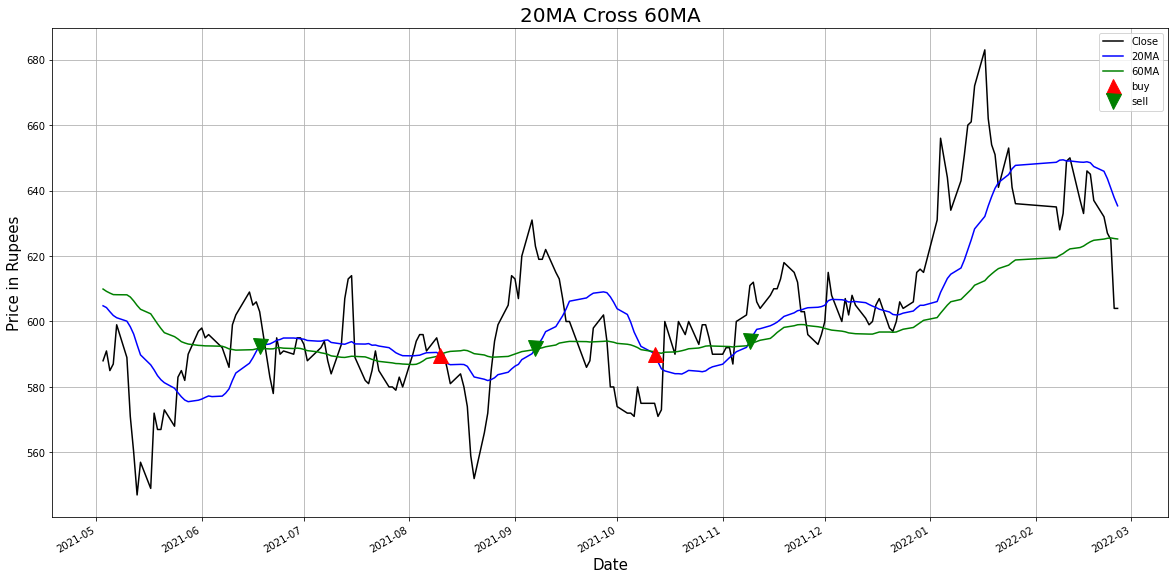

In [12]:
plt.figure(figsize = (20,10))
#畫線 
tsmc['Close'].plot(color = 'k') 
tsmc['MA_20'].plot(color = 'b',label = '20MA') 
tsmc['MA_60'].plot(color = 'g', label = '60MA')
# 買進信號
plt.plot(tsmc[tsmc['Position'] == 1].index, 
         tsmc['MA_20'][tsmc['Position'] == 1], 
         '^', markersize = 15, color = 'r', label = 'buy')
#賣出信號
plt.plot(tsmc[tsmc['Position'] == -1].index, 
         tsmc['MA_20'][tsmc['Position'] == -1], 
         'v', markersize = 15, color = 'g', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('20MA Cross 60MA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()
